## <strong><center>`ALY 6140 - Final Project - Group 6` </center></strong> 
##### <center>`by Shanmuga Vel Baskaran & Smiti`</center>
_____________________________________________________________

#### `Importing Necessary Libraries`

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

#Custom 
from customFunctions import loadData, checkMissingValues, replaceDistrictNames



# I have used the below library to import the dataset - I had issue importing just with the link directly. 
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#### `Importing  Data Set`

In [2]:
url1 = 'https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/b973d8cb-eeb2-4e7e-99da-c92938efc9c0/download/tmp6ctwy5y7.csv' # 2023
url2 = 'https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/313e56df-6d77-49d2-9c49-ee411f10cf58/download/tmpdfeo3qy2.csv' # 2022
url3 = 'https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/f4495ee9-c42c-4019-82c1-d067f07e45d2/download/tmpfap3hfze.csv' # 2021
url4 = 'https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/be047094-85fe-4104-a480-4fa3d03f9623/download/tmpkd_w64k_.csv' # 2020
url5 = 'https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/34e0ae6b-8c94-4998-ae9e-1b51551fe9ba/download/tmp6w6ts2d7.csv' # 2019
url6 = 'https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/e86f8e38-a23c-4c1a-8455-c8f94210a8f1/download/tmpf_uzkqpk.csv' # 2018
url7 = 'https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/64ad0053-842c-459b-9833-ff53d568f2e3/download/tmp3apxsafn.csv' # 2017
url8 = 'https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/b6c4e2c3-7b1e-4f4a-b019-bef8c6a0e882/download/tmp3ochjtdc.csv' # 2016
# url9 = 'https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/792031bf-b9bb-467c-b118-fe795befdf00/download/tmpzr3l5bxw.csv' # 2015

urls = [url1, url2, url3, url4, url5, url6, url7, url8]
ds = loadData(urls)
ds.shape

/Users/shanmu/Desktop/Data Modeling/boston-crimes-analysis/customFunctions.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(url, header=0)
/Users/shanmu/Desktop/Data Modeling/boston-crimes-analysis/customFunctions.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(url, header=0)
/Users/shanmu/Desktop/Data Modeling/boston-crimes-analysis/customFunctions.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(url, header=0)
/Users/shanmu/Desktop/Data Modeling/boston-crimes-analysis/customFunctions.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(url, header=0)
/Users/shanmu/Desktop/Data Modeling/boston-crimes-analysis/customFunctions.py:15: DtypeWarning: Columns (0) have mix

(640088, 17)

####  `Exploratory Data Analysis` <br>
`Diving deep into the dataset to gain insights`

In [3]:
ds.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,232010316,1106,NaN,FRAUD - CREDIT CARD / ATM FRAUD,E13,574,0,2023-01-01 00:00:00+00,2023,1,Sunday,0,NaN,WASHINGTON ST,42.309719,-71.104294,"(42.30971856767274, -71.10429431787648)"
1,232000031,724,NaN,AUTO THEFT,A1,77,0,2023-01-01 00:00:00+00,2023,1,Sunday,0,NaN,NEW SUDBURY ST,42.361839,-71.059765,"(42.361838566564714, -71.05976489094158)"
2,232000184,2905,NaN,VAL - VIOLATION OF AUTO LAW,B3,,0,2023-01-01 00:00:00+00,2023,1,Sunday,0,NaN,FRANKLIN HILL AVE,42.295585,-71.091580,"(42.29558506587588, -71.0915803792111)"
3,232000648,617,NaN,LARCENY THEFT FROM BUILDING,D14,778,0,2023-01-01 00:00:00+00,2023,1,Sunday,0,NaN,WASHINGTON STREET,NaN,NaN,NaN
4,232005137,2647,NaN,THREATS TO DO BODILY HARM,D14,778,0,2023-01-01 00:00:00+00,2023,1,Sunday,0,NaN,WASHINGTON ST,42.349056,-71.150498,"(42.34905600030506, -71.15049849975023)"


In [4]:
# Data Types
ds.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

In [5]:
# Null Values and its Count
checkMissingValues(ds)

INCIDENT_NUMBER: 0
OFFENSE_CODE: 0
OFFENSE_CODE_GROUP: 340432
OFFENSE_DESCRIPTION: 0
DISTRICT: 4288
REPORTING_AREA: 0
SHOOTING: 298452
OCCURRED_ON_DATE: 0
YEAR: 0
MONTH: 0
DAY_OF_WEEK: 0
HOUR: 0
UCR_PART: 340527
STREET: 10616
Lat: 36869
Long: 36869
Location: 36869


In [6]:
# Handling the Missing Values of Offence Code 
# Here we can see the Offence Group Missing Values is huge for analysis purpose i am filling those values with Other
ds['OFFENSE_CODE_GROUP'].fillna('Other', inplace=True)

In [7]:
# Replacing the Null Values of District
ds['DISTRICT'].fillna('No Data', inplace=True)

In [8]:
# Handling the Missing Values of Shooting Column
# Here i am assuming the missing values as no shooting happened and proceeding to handle the missing vaues 
ds['SHOOTING'].fillna(0, inplace=True)
# Also renaming the Y as 1 to maintain the format 
ds['SHOOTING'].replace('Y', 1, inplace=True)

print(ds.SHOOTING.value_counts())

0    635038
1      5050
Name: SHOOTING, dtype: int64


In [9]:
checkMissingValues(ds)

INCIDENT_NUMBER: 0
OFFENSE_CODE: 0
OFFENSE_CODE_GROUP: 0
OFFENSE_DESCRIPTION: 0
DISTRICT: 0
REPORTING_AREA: 0
SHOOTING: 0
OCCURRED_ON_DATE: 0
YEAR: 0
MONTH: 0
DAY_OF_WEEK: 0
HOUR: 0
UCR_PART: 340527
STREET: 10616
Lat: 36869
Long: 36869
Location: 36869


In [10]:
# Handling the Missing Values of UCR_PART Column
ds['UCR_PART'].fillna('Other', inplace=True)
ds['STREET'].fillna('Other', inplace=True)

In [11]:
# Based on the Latitude and Longitude we have we cannot determine the district since it is having a lot of Unique Values 
ds['Lat'] = np.round(ds['Lat'], 2)
ds['Long'] = np.round(ds['Long'], 2)

ds.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,232010316,1106,Other,FRAUD - CREDIT CARD / ATM FRAUD,E13,574,0,2023-01-01 00:00:00+00,2023,1,Sunday,0,Other,WASHINGTON ST,42.31,-71.10,"(42.30971856767274, -71.10429431787648)"
1,232000031,724,Other,AUTO THEFT,A1,77,0,2023-01-01 00:00:00+00,2023,1,Sunday,0,Other,NEW SUDBURY ST,42.36,-71.06,"(42.361838566564714, -71.05976489094158)"
2,232000184,2905,Other,VAL - VIOLATION OF AUTO LAW,B3,,0,2023-01-01 00:00:00+00,2023,1,Sunday,0,Other,FRANKLIN HILL AVE,42.30,-71.09,"(42.29558506587588, -71.0915803792111)"
3,232000648,617,Other,LARCENY THEFT FROM BUILDING,D14,778,0,2023-01-01 00:00:00+00,2023,1,Sunday,0,Other,WASHINGTON STREET,NaN,NaN,NaN
4,232005137,2647,Other,THREATS TO DO BODILY HARM,D14,778,0,2023-01-01 00:00:00+00,2023,1,Sunday,0,Other,WASHINGTON ST,42.35,-71.15,"(42.34905600030506, -71.15049849975023)"


In [12]:
# Handling Lat and Long Null Values 
ds['Lat'].fillna(np.round((ds['Lat'].mean()), 2), inplace=True)
ds['Long'].fillna(np.round((ds['Long'].mean()), 2), inplace=True)
# customFunctions.handleNull(ds)

In [13]:
checkMissingValues(ds)
# Now We have handled all the Null Values 

INCIDENT_NUMBER: 0
OFFENSE_CODE: 0
OFFENSE_CODE_GROUP: 0
OFFENSE_DESCRIPTION: 0
DISTRICT: 0
REPORTING_AREA: 0
SHOOTING: 0
OCCURRED_ON_DATE: 0
YEAR: 0
MONTH: 0
DAY_OF_WEEK: 0
HOUR: 0
UCR_PART: 0
STREET: 0
Lat: 0
Long: 0
Location: 36869


In [14]:
ds = ds.drop('Location', axis=1)

In [15]:
ds['DISTRICT'].value_counts()

B2          95768
C11         83084
D4          82486
A1          71201
B3          70314
C6          48555
D14         42760
E13         35910
E18         35849
E5          28637
A7          27458
A15         13203
No Data      4288
External      575
Name: DISTRICT, dtype: int64

In [16]:
# Lets Rename the District code with District Name 
# https://bpdnews.com/districts
# from customFunctions import replaceDistrictNames
replaceDistrictNames(ds, 'DISTRICT')

ds.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long
0,232010316,1106,Other,FRAUD - CREDIT CARD / ATM FRAUD,Jamaica Plain,574,0,2023-01-01 00:00:00+00,2023,1,Sunday,0,Other,WASHINGTON ST,42.31,-71.10
1,232000031,724,Other,AUTO THEFT,Downtown,77,0,2023-01-01 00:00:00+00,2023,1,Sunday,0,Other,NEW SUDBURY ST,42.36,-71.06
2,232000184,2905,Other,VAL - VIOLATION OF AUTO LAW,Mattapan,,0,2023-01-01 00:00:00+00,2023,1,Sunday,0,Other,FRANKLIN HILL AVE,42.30,-71.09
3,232000648,617,Other,LARCENY THEFT FROM BUILDING,Brighton,778,0,2023-01-01 00:00:00+00,2023,1,Sunday,0,Other,WASHINGTON STREET,42.32,-71.08
4,232005137,2647,Other,THREATS TO DO BODILY HARM,Brighton,778,0,2023-01-01 00:00:00+00,2023,1,Sunday,0,Other,WASHINGTON ST,42.35,-71.15


#### `  Visualizations`

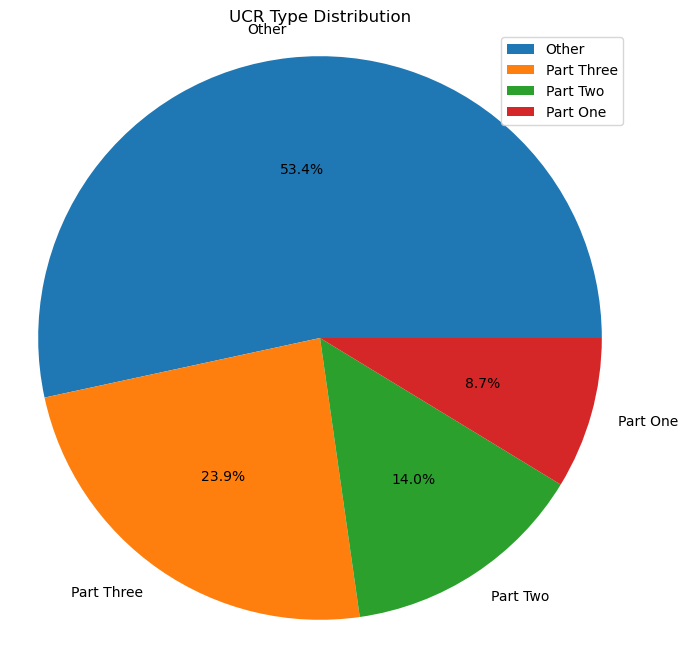

In [17]:
# UCR Type of the Crime 
# Count the occurrences of each UCR type
ucr_counts = ds['UCR_PART'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(ucr_counts, labels=ucr_counts.index, autopct='%1.1f%%')
plt.title('UCR Type Distribution')
plt.axis('equal')

# Add legend
plt.legend(ucr_counts.index, loc='best')

plt.show()

`we can see that the Part 3 crimes are higher than the part 1 and 2 crimes. The part 1 crime is more severe crimes and the scale comes down in Part 2 and 3. Also majority of the crimes are also not listed here. `

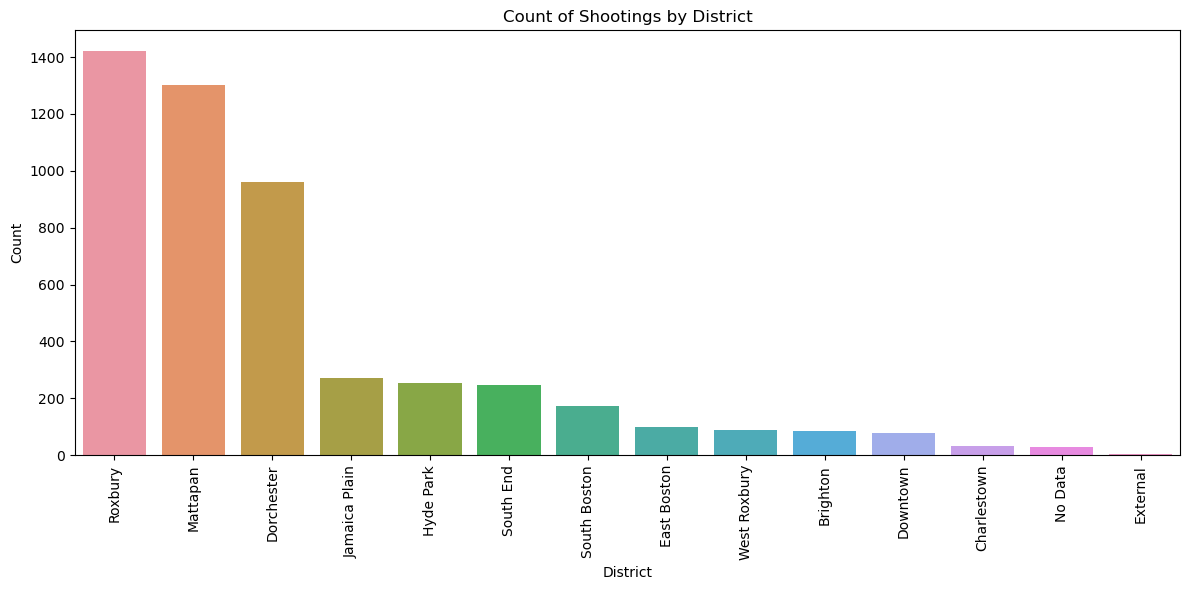

In [18]:
# Classifying the Shooting areas 
shooting_areas = ds[ds['SHOOTING'] == 1]
shooting_district_counts = shooting_areas['DISTRICT'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=shooting_district_counts.index, y=shooting_district_counts.values)
plt.title('Count of Shootings by District')
plt.xlabel('District')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

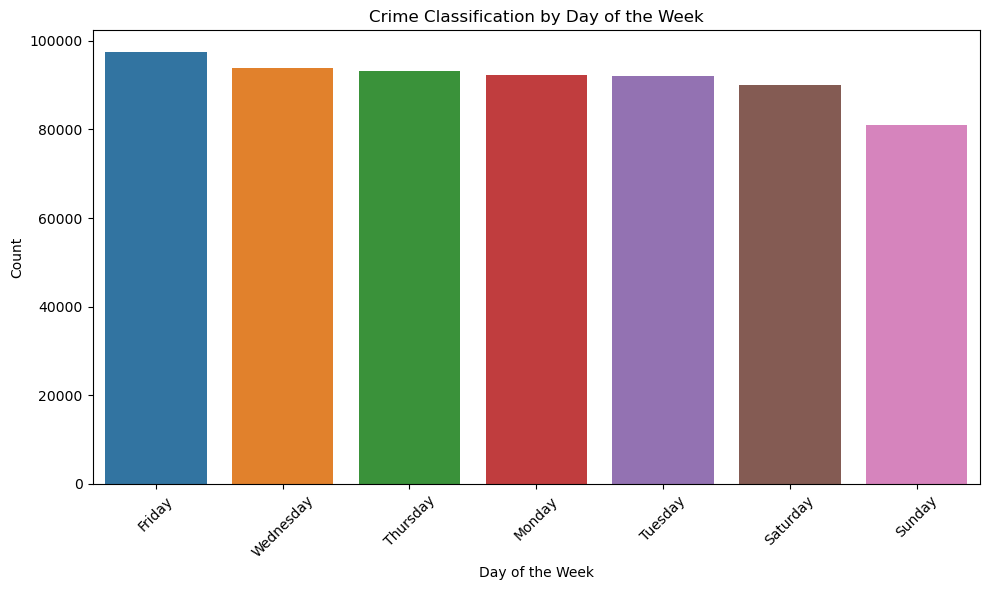

In [19]:
# Day wise crime classification 
day_counts = ds['DAY_OF_WEEK'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=ds, x='DAY_OF_WEEK', order=day_counts.index)

plt.title('Crime Classification by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [20]:
# Crime based on the time of Day

# Define time intervals
time_diff = [0, 6, 12, 18, 24]  # Breaking day into 6 interval periods

# Classify crimes based on time intervals
ds['time_diff'] = pd.cut(ds['HOUR'], bins=time_diff, labels=['00-06', '06-12', '12-18', '18-24'], include_lowest=True)

# Count the occurrences of each time category
time_category_counts = ds['time_diff'].value_counts()

print(time_category_counts)

# Create the shift column using nested if-else statements
ds['shift'] = ds['time_diff'].map(lambda x: 'Late Night' if x == '00-06' else 
                                             'Morning' if x == '06-12' else 
                                             'Day' if x == '12-18' else 
                                             'Evening')

# Count the occurrences of each shift category
shift_counts = ds['shift'].value_counts()

print(shift_counts)


12-18    221689
06-12    176874
18-24    138890
00-06    102635
Name: time_diff, dtype: int64
Day           221689
Morning       176874
Evening       138890
Late Night    102635
Name: shift, dtype: int64


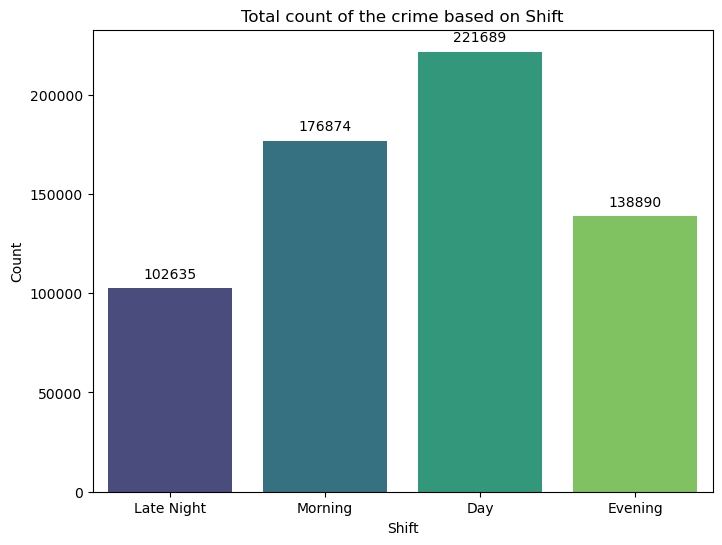

In [21]:
# Create the shift plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=ds, x='time_diff', palette='viridis')

# Add labels to the count bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Customize the x-axis labels
shift_labels = ['Late Night', 'Morning', 'Day', 'Evening']
ax.set_xticklabels(shift_labels)

# Customize the plot
plt.title('Total count of the crime based on Shift')
plt.xlabel('Shift')
plt.ylabel('Count')

# Display the plot
plt.show()

In [22]:
# Crime based on the seasons

# Define the season mapping
season_mapping = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
}


# Map the months to seasons
ds['SEASON'] = ds['MONTH'].map(season_mapping)

# Count the crimes by season
season_counts = ds['SEASON'].value_counts()

# Print the counts
print(season_counts)

Summer    168267
Spring    167654
Fall      154057
Winter    150110
Name: SEASON, dtype: int64


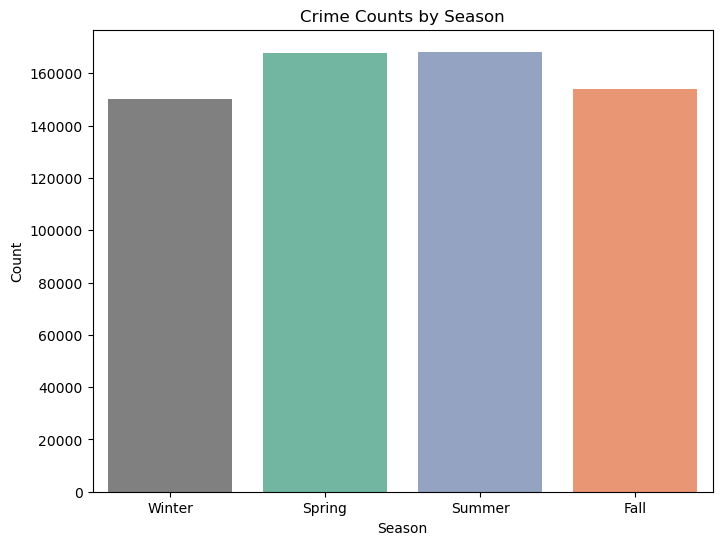

In [23]:
# Define a color palette based on the seasons
season_colors = {'Winter': 'gray', 'Spring': '#66c2a5', 'Summer': '#8da0cb', 'Fall': '#fc8d62'}

# Create a countplot with customized colors
plt.figure(figsize=(8, 6))
sns.countplot(data=ds, x='SEASON', palette=season_colors)

# Customize the plot
plt.title('Crime Counts by Season')
plt.xlabel('Season')
plt.ylabel('Count')

# Display the plot
plt.show()

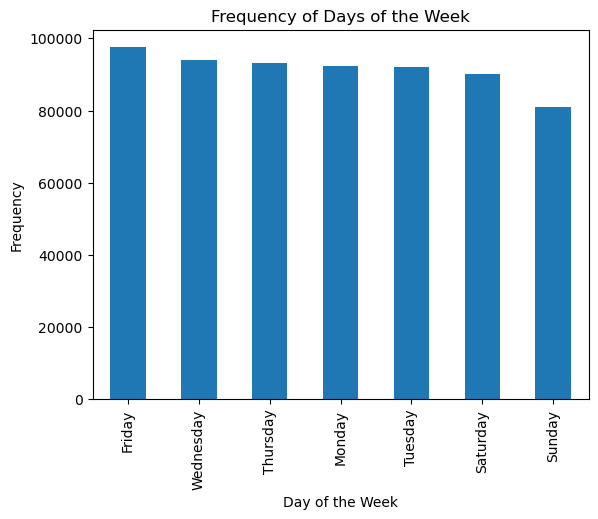

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the frequency counts for days of the week
day_counts = ds['DAY_OF_WEEK'].value_counts()

# Create a bar graph for days of the week
day_counts.plot.bar()
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Frequency of Days of the Week')
plt.xticks(rotation=90)
plt.show()


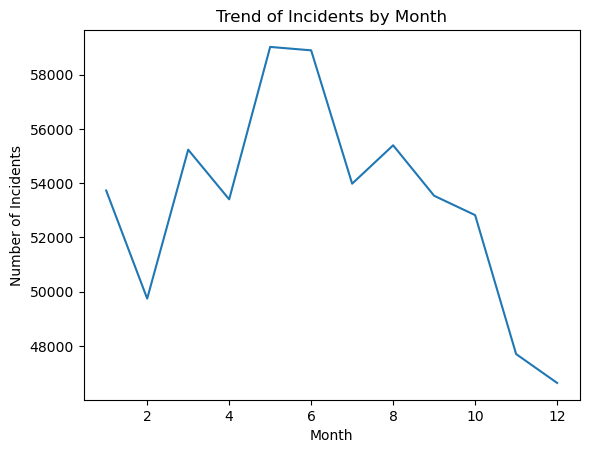

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'OCCURRED_ON_DATE' column to datetime with utc=True
occuredOnDate = pd.to_datetime(ds['OCCURRED_ON_DATE'], utc=True)

# Group by month and count incidents
incidents_by_month = occuredOnDate.dt.month.value_counts().sort_index()

# Create a line graph for incidents by month
plt.plot(incidents_by_month.index, incidents_by_month.values)
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.title('Trend of Incidents by Month')
plt.show()


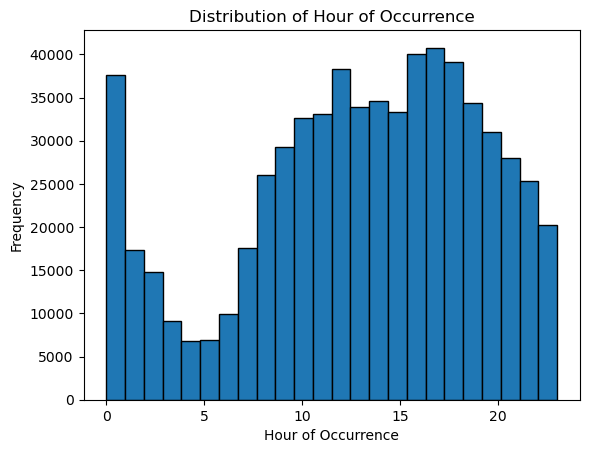

In [26]:
import matplotlib.pyplot as plt

# Create a histogram of the hour of occurrence
plt.hist(ds['HOUR'], bins=24, edgecolor='black')
plt.xlabel('Hour of Occurrence')
plt.ylabel('Frequency')
plt.title('Distribution of Hour of Occurrence')
plt.show()


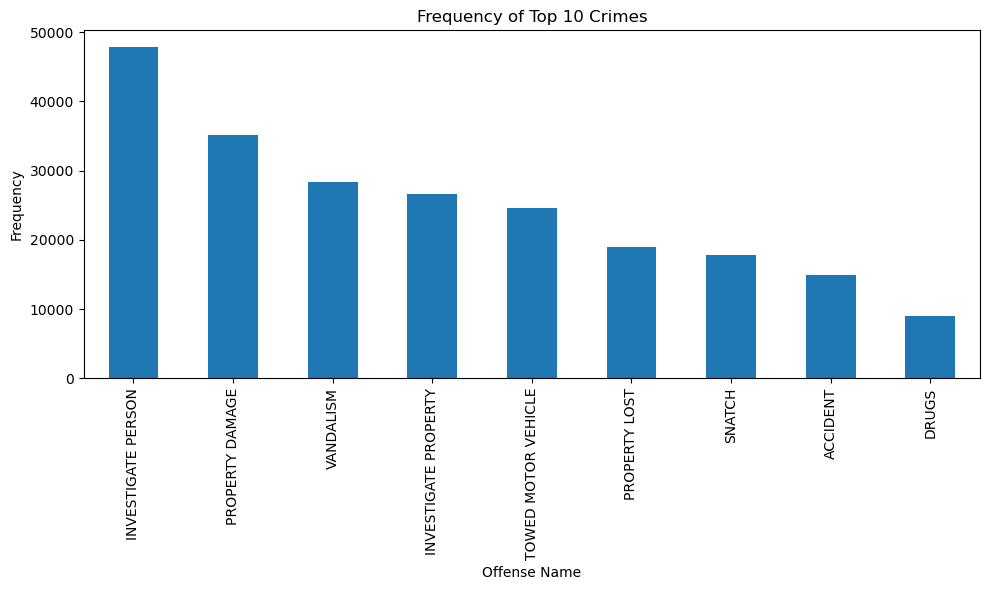

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a mapping of offense codes to offense names
offense_mapping = {
    3115: 'INVESTIGATE PERSON',
    1831: 'DRUGS',
    3831: 'PROPERTY DAMAGE',
    3114: 'INVESTIGATE PROPERTY',
    3410: 'TOWED MOTOR VEHICLE',
    810: 'AUTO THEFT',
    1402: 'VANDALISM',
    3201: 'PROPERTY LOST',
    613: 'SNATCH',
    3802: 'ACCIDENT',
}

# Add a new column to the DataFrame for offense names
offenceName = ds['OFFENSE_CODE'].map(offense_mapping)

# Bar Graph: Frequency of Top 10 Crimes with Offense Names
top_10_offenses = offenceName.value_counts().head(10)

plt.figure(figsize=(10, 6))
top_10_offenses.plot.bar()
plt.xlabel('Offense Name')
plt.ylabel('Frequency')
plt.title('Frequency of Top 10 Crimes')
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.show()


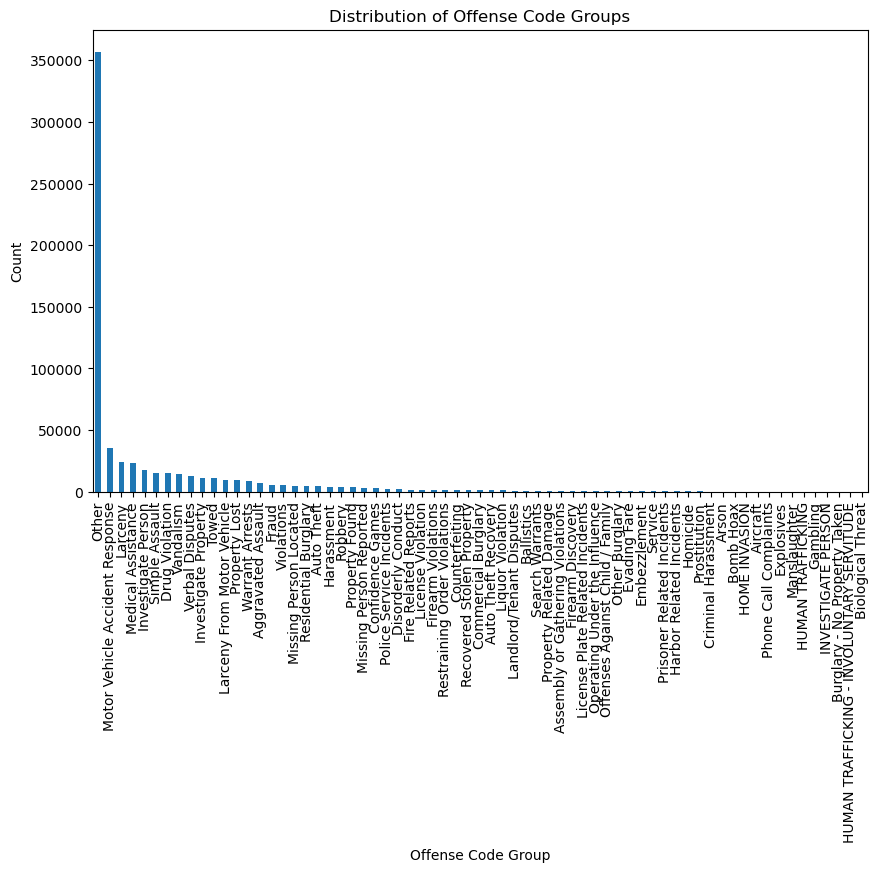

In [28]:
# Bar Plot of Offense Code Group
plt.figure(figsize=(10, 6))
ds['OFFENSE_CODE_GROUP'].value_counts().plot(kind='bar')
plt.xlabel('Offense Code Group')
plt.ylabel('Count')
plt.title('Distribution of Offense Code Groups')
plt.show()

In [29]:
# Lets drop the No data columns in District

ds = ds.drop(ds[ds['DISTRICT'] == 'No Data'].index)
ds['DISTRICT'].value_counts()

Roxbury          95768
Dorchester       83084
South End        82486
Downtown         71201
Mattapan         70314
South Boston     48555
Brighton         42760
Jamaica Plain    35910
Hyde Park        35849
West Roxbury     28637
East Boston      27458
Charlestown      13203
External           575
Name: DISTRICT, dtype: int64

In [30]:

checkMissingValues(ds)

INCIDENT_NUMBER: 0
OFFENSE_CODE: 0
OFFENSE_CODE_GROUP: 0
OFFENSE_DESCRIPTION: 0
DISTRICT: 0
REPORTING_AREA: 0
SHOOTING: 0
OCCURRED_ON_DATE: 0
YEAR: 0
MONTH: 0
DAY_OF_WEEK: 0
HOUR: 0
UCR_PART: 0
STREET: 0
Lat: 0
Long: 0
time_diff: 0
shift: 0
SEASON: 0


In [31]:
ds1 = ds

In [32]:
ds1.drop(['INCIDENT_NUMBER', 'SEASON', 'time_diff', 'shift', 'OCCURRED_ON_DATE' ,'STREET' , 'OFFENSE_CODE' , 'REPORTING_AREA'],axis=1, inplace=True)
ds1.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Lat,Long
0,Other,FRAUD - CREDIT CARD / ATM FRAUD,Jamaica Plain,0,2023,1,Sunday,0,Other,42.31,-71.10
1,Other,AUTO THEFT,Downtown,0,2023,1,Sunday,0,Other,42.36,-71.06
2,Other,VAL - VIOLATION OF AUTO LAW,Mattapan,0,2023,1,Sunday,0,Other,42.30,-71.09
3,Other,LARCENY THEFT FROM BUILDING,Brighton,0,2023,1,Sunday,0,Other,42.32,-71.08
4,Other,THREATS TO DO BODILY HARM,Brighton,0,2023,1,Sunday,0,Other,42.35,-71.15


In [33]:
# One Hot Encoding the Offence Code

encode  = LabelEncoder()
encode.fit(ds1['OFFENSE_CODE_GROUP'])
ds1['Offense Code'] = encode.transform(ds1['OFFENSE_CODE_GROUP'])
ds1.drop(['OFFENSE_CODE_GROUP'],axis=1, inplace=True)


In [34]:
# One Hot Encoding the Offence Description Code

encode2  = LabelEncoder()
encode2.fit(ds1['OFFENSE_DESCRIPTION'])
ds1['Offense Desc Code'] = encode2.transform(ds1['OFFENSE_DESCRIPTION'])
ds1.drop(['OFFENSE_DESCRIPTION'],axis=1, inplace=True)
ds1.head()

,DISTRICT,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Lat,Long,Offense Code,Offense Desc Code
0,Jamaica Plain,0,2023,1,Sunday,0,Other,42.31,-71.10,46,100
1,Downtown,0,2023,1,Sunday,0,Other,42.36,-71.06,46,19
2,Mattapan,0,2023,1,Sunday,0,Other,42.30,-71.09,46,261
3,Brighton,0,2023,1,Sunday,0,Other,42.32,-71.08,46,142
4,Brighton,0,2023,1,Sunday,0,Other,42.35,-71.15,46,253


In [35]:
# One Hot Encoding the District

encode3  = LabelEncoder()
encode3.fit(ds1['DISTRICT'])
ds1['District Code'] = encode3.transform(ds1['DISTRICT'])
ds1.drop(['DISTRICT'],axis=1, inplace=True)
ds1.head()

,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Lat,Long,Offense Code,Offense Desc Code,District Code
0,0,2023,1,Sunday,0,Other,42.31,-71.10,46,100,7
1,0,2023,1,Sunday,0,Other,42.36,-71.06,46,19,3
2,0,2023,1,Sunday,0,Other,42.30,-71.09,46,261,8
3,0,2023,1,Sunday,0,Other,42.32,-71.08,46,142,0
4,0,2023,1,Sunday,0,Other,42.35,-71.15,46,253,0


In [36]:
# One Hot Encoding the Day of the week

encode4  = LabelEncoder()
encode4.fit(ds1['DAY_OF_WEEK'])
ds1['Day Code'] = encode4.transform(ds1['DAY_OF_WEEK'])
ds1.drop(['DAY_OF_WEEK'],axis=1, inplace=True)
ds1.head()

,SHOOTING,YEAR,MONTH,HOUR,UCR_PART,Lat,Long,Offense Code,Offense Desc Code,District Code,Day Code
0,0,2023,1,0,Other,42.31,-71.10,46,100,7,3
1,0,2023,1,0,Other,42.36,-71.06,46,19,3,3
2,0,2023,1,0,Other,42.30,-71.09,46,261,8,3
3,0,2023,1,0,Other,42.32,-71.08,46,142,0,3
4,0,2023,1,0,Other,42.35,-71.15,46,253,0,3


In [37]:
# One Hot Encoding the UCR

encode5  = LabelEncoder()
encode5.fit(ds1['UCR_PART'])
ds1['UCR Code'] = encode5.transform(ds1['UCR_PART'])
ds1.drop(['UCR_PART'],axis=1, inplace=True)
ds1.head()

,SHOOTING,YEAR,MONTH,HOUR,Lat,Long,Offense Code,Offense Desc Code,District Code,Day Code,UCR Code
0,0,2023,1,0,42.31,-71.10,46,100,7,3,0
1,0,2023,1,0,42.36,-71.06,46,19,3,3,0
2,0,2023,1,0,42.30,-71.09,46,261,8,3,0
3,0,2023,1,0,42.32,-71.08,46,142,0,3,0
4,0,2023,1,0,42.35,-71.15,46,253,0,3,0


In [38]:
ds1.columns

Index(['SHOOTING', 'YEAR', 'MONTH', 'HOUR', 'Lat', 'Long', 'Offense Code',
       'Offense Desc Code', 'District Code', 'Day Code', 'UCR Code'],
      dtype='object')

In [39]:
ds.shape

(635800, 11)

In [40]:
# Model
X_train = ds[:500000]
X_test = ds[500000:]

In [41]:
KMeansAlgModel = KMeans(n_clusters=5,init='k-means++', 
                     random_state=33,algorithm= 'auto') 
KMeansAlgModel.fit(X_train)

/Users/shanmu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shanmu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', n_clusters=5, random_state=33)

In [42]:
#Calculating the Prediction of K Means Model
y_pred = KMeansAlgModel.predict(X_test)
print('Predicted Value for K Means Model is : ' , y_pred[:10])

Predicted Value for K Means Model is :  [0 0 2 0 1 0 1 1 4 4]


In [43]:
# Unsupervised Training
NearestNeighbor = NearestNeighbors(n_neighbors=4,radius=1.0,algorithm='auto')
NearestNeighbor.fit(X_train)

NearestNeighbors(n_neighbors=4)

In [44]:
AggClustering = AgglomerativeClustering(n_clusters=5,affinity='euclidean',
                                             linkage='ward')

y_pred_train = AggClustering.fit_predict(X_train[:1000])
y_pred_test = AggClustering.fit_predict(X_test[:1000])

/Users/shanmu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/shanmu/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


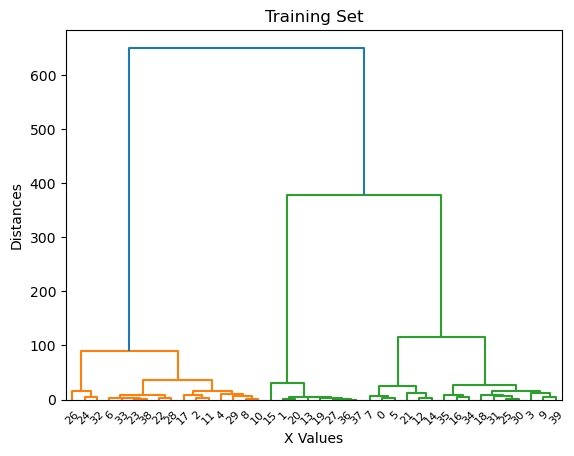

In [45]:
# the Hierarchical graph for Training set
dendrogramMl = sch.dendrogram(sch.linkage(X_train[:40], method = 'ward'))
plt.title('Training Set')
plt.xlabel('X Values')
plt.ylabel('Distances')
plt.show()

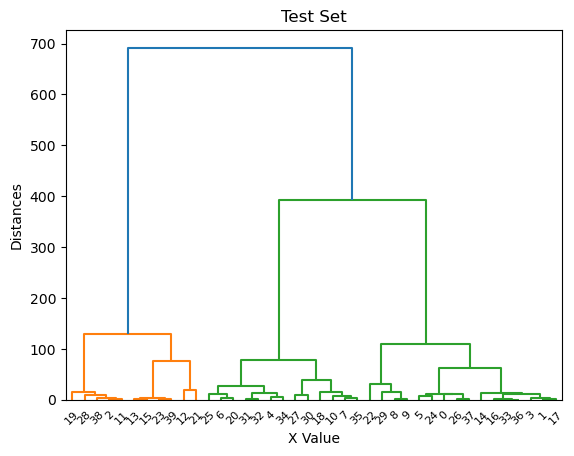

In [46]:
# draw the Hierarchical graph for Test set
dendrogramMlTest = sch.dendrogram(sch.linkage(X_test[:40], method = 'ward'))# it can be complete,average,single
plt.title('Test Set')
plt.xlabel('X Value')
plt.ylabel('Distances')
plt.show()